# Парная линейная регрессия

### Мамедова Лейла ПИ19-2

Цель работы:

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

Задания для выполнения:
1.	Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысл).
a.	Можно взять не очень актуальные, но готовые данные отсюда.
2.	Построить модель парной линейной регрессии с использованием метода градиентного спуска.
3.	Оценить на графике качество построенной модели.
4.	Построить кривые обучения.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [3]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


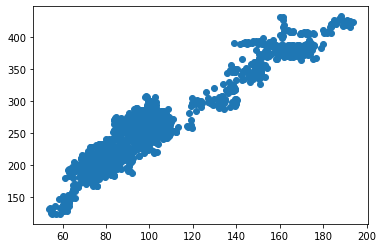

In [4]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']
plt.figure()
plt.scatter(x, y)
plt.show()

In [5]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    # реализуем метод, который принимает значение входной переменной и возвращает теоретическое значение выходной 
    # - это прямое действие нашей регрессии - метод предсказания результата по факторам 
    # (в случае парной регрессии - по одному фактору):     
    def predict(self, x):
        return self.b0 + self.b1 * x

    # Зададим функцию ошибки:
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    # Теперь реализуем метод градиентного спуска. 
    # Он должен принимать массив X и массив Y и обновлять параметры регрессии в соответствии в формулами градиентного спуска:
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [6]:
# Запустим наш градиентный спуск:

hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


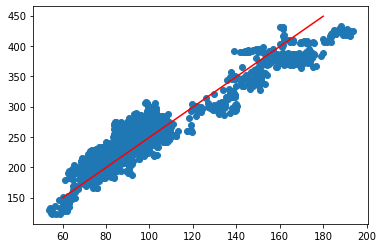

In [7]:
# Посмотрим, как теперь наша регрессия выглядит на графике:

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

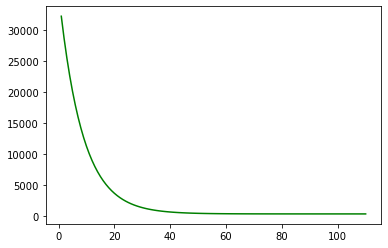

In [8]:
# Проанализируем, как ошибка регрессии менялась со временем:

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()